In [3]:
!pip install torch


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install transformers

     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ------------------------------------- -- 41.0/43.7 kB ? eta -:--:--
     -------------------------------------- 43.7/43.7 kB 726.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------  41.0/41.5 kB ? eta -:--:--
     ---------------------------------------  41.0/41.5 kB ? eta -:--:--
     -------------------------------------- 41.5/41.5 kB 333.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.5 MB 34.6 MB/s eta 0:00:01
   ----------------------- ---------------- 5.5/9.5 MB 69.9 MB/s eta 0:00:01
   --------------------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 허깅페이스 코드 붙혀넣기

허깅페이스에서 대표적인 Object Detection 모델을 찾고 코드 전체를 실행해봅니다.

링크: https://huggingface.co/facebook/detr-resnet-50

In [4]:
# 허깅페이스에서 불러온 코드 붙여넣기
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


## (심화) 코드 이해하기

### 1. 필요한 라이브러리 임포트
먼저 필요한 라이브러리를 임포트합니다.

- DetrImageProcessor 및 DetrForObjectDetection: Hugging Face에서 제공하는 Object Detection 모델과 전처리 도구.
- torch: 딥러닝 프레임워크인 PyTorch.
- Image: 이미지 로드 및 처리.
- requests: URL로부터 이미지를 로드하기 위한 HTTP 요청.
- matplotlib.pyplot 및 matplotlib.patches: 이미지를 시각화하고 객체 감지 결과를 그리기 위한 도구.

In [5]:
# 필요한 라이브러리 임포트
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection  # Object Detection 모델 및 전처리 도구
from PIL import Image  # 이미지 처리
import requests  # 이미지 URL 요청
import matplotlib.pyplot as plt  # 시각화 도구
import matplotlib.patches as patches  # 박스 그리기 도구


### 2. 이미지 로드 및 모델 준비
이미지를 로드하고 객체 감지 모델을 초기화합니다. 이미지는 인터넷 URL 또는 로컬 경로에서 불러올 수 있습니다.

(참고) 함수설명

- url: 인터넷에서 이미지를 가져올 URL.
- Image.open: URL이나 로컬 파일 경로에서 이미지를 불러옴.
- DetrImageProcessor.from_pretrained: 사전 학습된 모델을 위한 전처리기.
- DetrForObjectDetection.from_pretrained: 사전 학습된 Object Detection 모델.

In [19]:
# 인터넷 URL에서 이미지 로드
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# 로컬 파일에서 이미지 로드
image_path = "C:/Users/qq/Downloads/고양이 이미지2.jfif"  # 이미지 경로를 여기에 입력하세요
image = Image.open(image_path)

# 프로세서 및 모델 초기화
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

### 3. 모델 추론 및 결과값 반환
모델을 사용해 이미지를 추론하고, 그 결과를 처리하여 경계 상자와 레이블을 가져옵니다.

(참고) 함수설명,

- processor(images=image, return_tensors="pt"): 이미지를 모델에 맞게 전처리.
- model(**inputs): 모델을 사용해 추론 수행.
- torch.tensor([image.size[::-1]]): 모델이 출력할 대상 이미지의 크기를 지정.
- processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9): 모델의 결과를 경계 상자 및 레이블로 변환.

In [20]:
# 이미지 전처리 및 추론 수행
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# 출력값을 처리하여 경계 상자 및 레이블 얻기
target_sizes = torch.tensor([image.size[::-1]])  # 이미지 크기를 모델의 예상 결과 크기에 맞춤
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

#### 결과값 출력

In [21]:
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected cat with confidence 0.997 at location [0.06, 144.96, 73.75, 224.94]
Detected cat with confidence 0.999 at location [79.56, 77.0, 141.01, 151.3]
Detected cat with confidence 0.993 at location [151.92, 150.36, 223.58, 221.29]
Detected cat with confidence 0.973 at location [13.8, 26.58, 54.77, 71.27]
Detected cat with confidence 0.996 at location [155.07, 0.07, 222.27, 70.55]
Detected cat with confidence 0.991 at location [19.97, 73.01, 69.29, 150.39]
Detected cat with confidence 0.927 at location [77.99, 8.45, 138.52, 72.51]
Detected cat with confidence 0.994 at location [145.17, 75.0, 204.28, 148.63]
Detected cat with confidence 0.997 at location [83.2, 156.07, 130.66, 220.87]


### 4. 시각화
감지된 객체의 경계 상자와 레이블을 이미지 위에 시각화합니다.

(참고) 함수 설명,


- plt.subplots: 플롯을 그릴 수 있는 새 Figure 생성.
- ax.imshow(image): 이미지를 플롯에 추가.
- patches.Rectangle: 경계 상자를 그리기 위한 사각형 패치 생성.
- ax.add_patch(rect): 경계 상자 패치를 플롯에 추가.
- ax.text: 경계 상자 위에 레이블과 신뢰도를 표시.


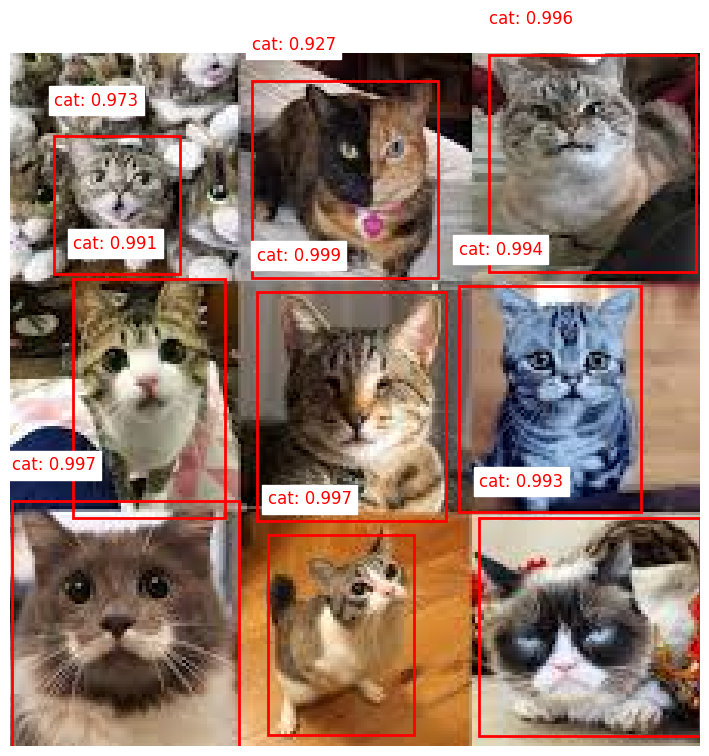

In [22]:
# 원본 이미지에 경계 상자를 오버레이하기 위한 시각화
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# 각 경계 상자를 그리고 레이블 및 신뢰도 표시
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = model.config.id2label[label.item()]  # 레이블 이름 얻기
    confidence = round(score.item(), 3)  # 신뢰도
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')  # 경계 상자 그리기
    ax.add_patch(rect)  # 경계 상자 추가
    ax.text(box[0], box[1] - 10, f"{label_name}: {confidence}", color='red', fontsize=12, backgroundcolor="white")  # 레이블 및 신뢰도 표시

plt.axis('off')  # 축 숨기기
plt.show()  # 이미지 표시